# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM progens

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4a_progen_dr_20200714.h5ad")

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                       92
MEMP                      16
MEP                       70
early MK                  70
eo/baso/mast precursor    70
early erythroid           70
MPP myeloid               92
CMP                       70
GMP                       70
MOP                       70
promyelocyte              70
LMPP                      34
ELP                       70
pre pro B progenitor      70
dtype: int64

# Add cell cycle info

In [6]:
#Score cell cycle and visualize the effect:
# load file in
cc_genes_file = '/Users/b8058304/Documents/PhD_work/Coding/bm/resources_for_pipelines/cell_cycle_makosco.csv'
cc_genes = pd.read_csv(cc_genes_file, delimiter=',')
# removing na from s and g2m list
s_genes = cc_genes['S'].dropna()
g2m_genes = cc_genes['G2/M'].dropna()

In [7]:
y_genes = s_genes.tolist()
no_trail = []

for x in y_genes:
    y = x.strip()
    no_trail.append(y)
    
s_genes = no_trail 

In [8]:
y_genes = g2m_genes.tolist()
no_trail = []

for x in y_genes:
    y = x.strip()
    no_trail.append(y)
    
g2m_genes = no_trail 

In [9]:
s_genes_mm = adata.var_names[np.isin(adata.var_names, s_genes)]

In [10]:
g2m_genes_mm = adata.var_names[np.isin(adata.var_names, g2m_genes)]

In [11]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_mm, g2m_genes=g2m_genes_mm)

In [12]:
adata.obs["phase_combined"] = adata.obs["phase"].replace(["G2M", "S"], ["G2M/S", "G2M/S"])

In [13]:
adata.obs["S/G2M_score_combined"] = (adata.obs["G2M_score"] + adata.obs["S_score"])/2

... storing 'phase' as categorical
... storing 'phase_combined' as categorical


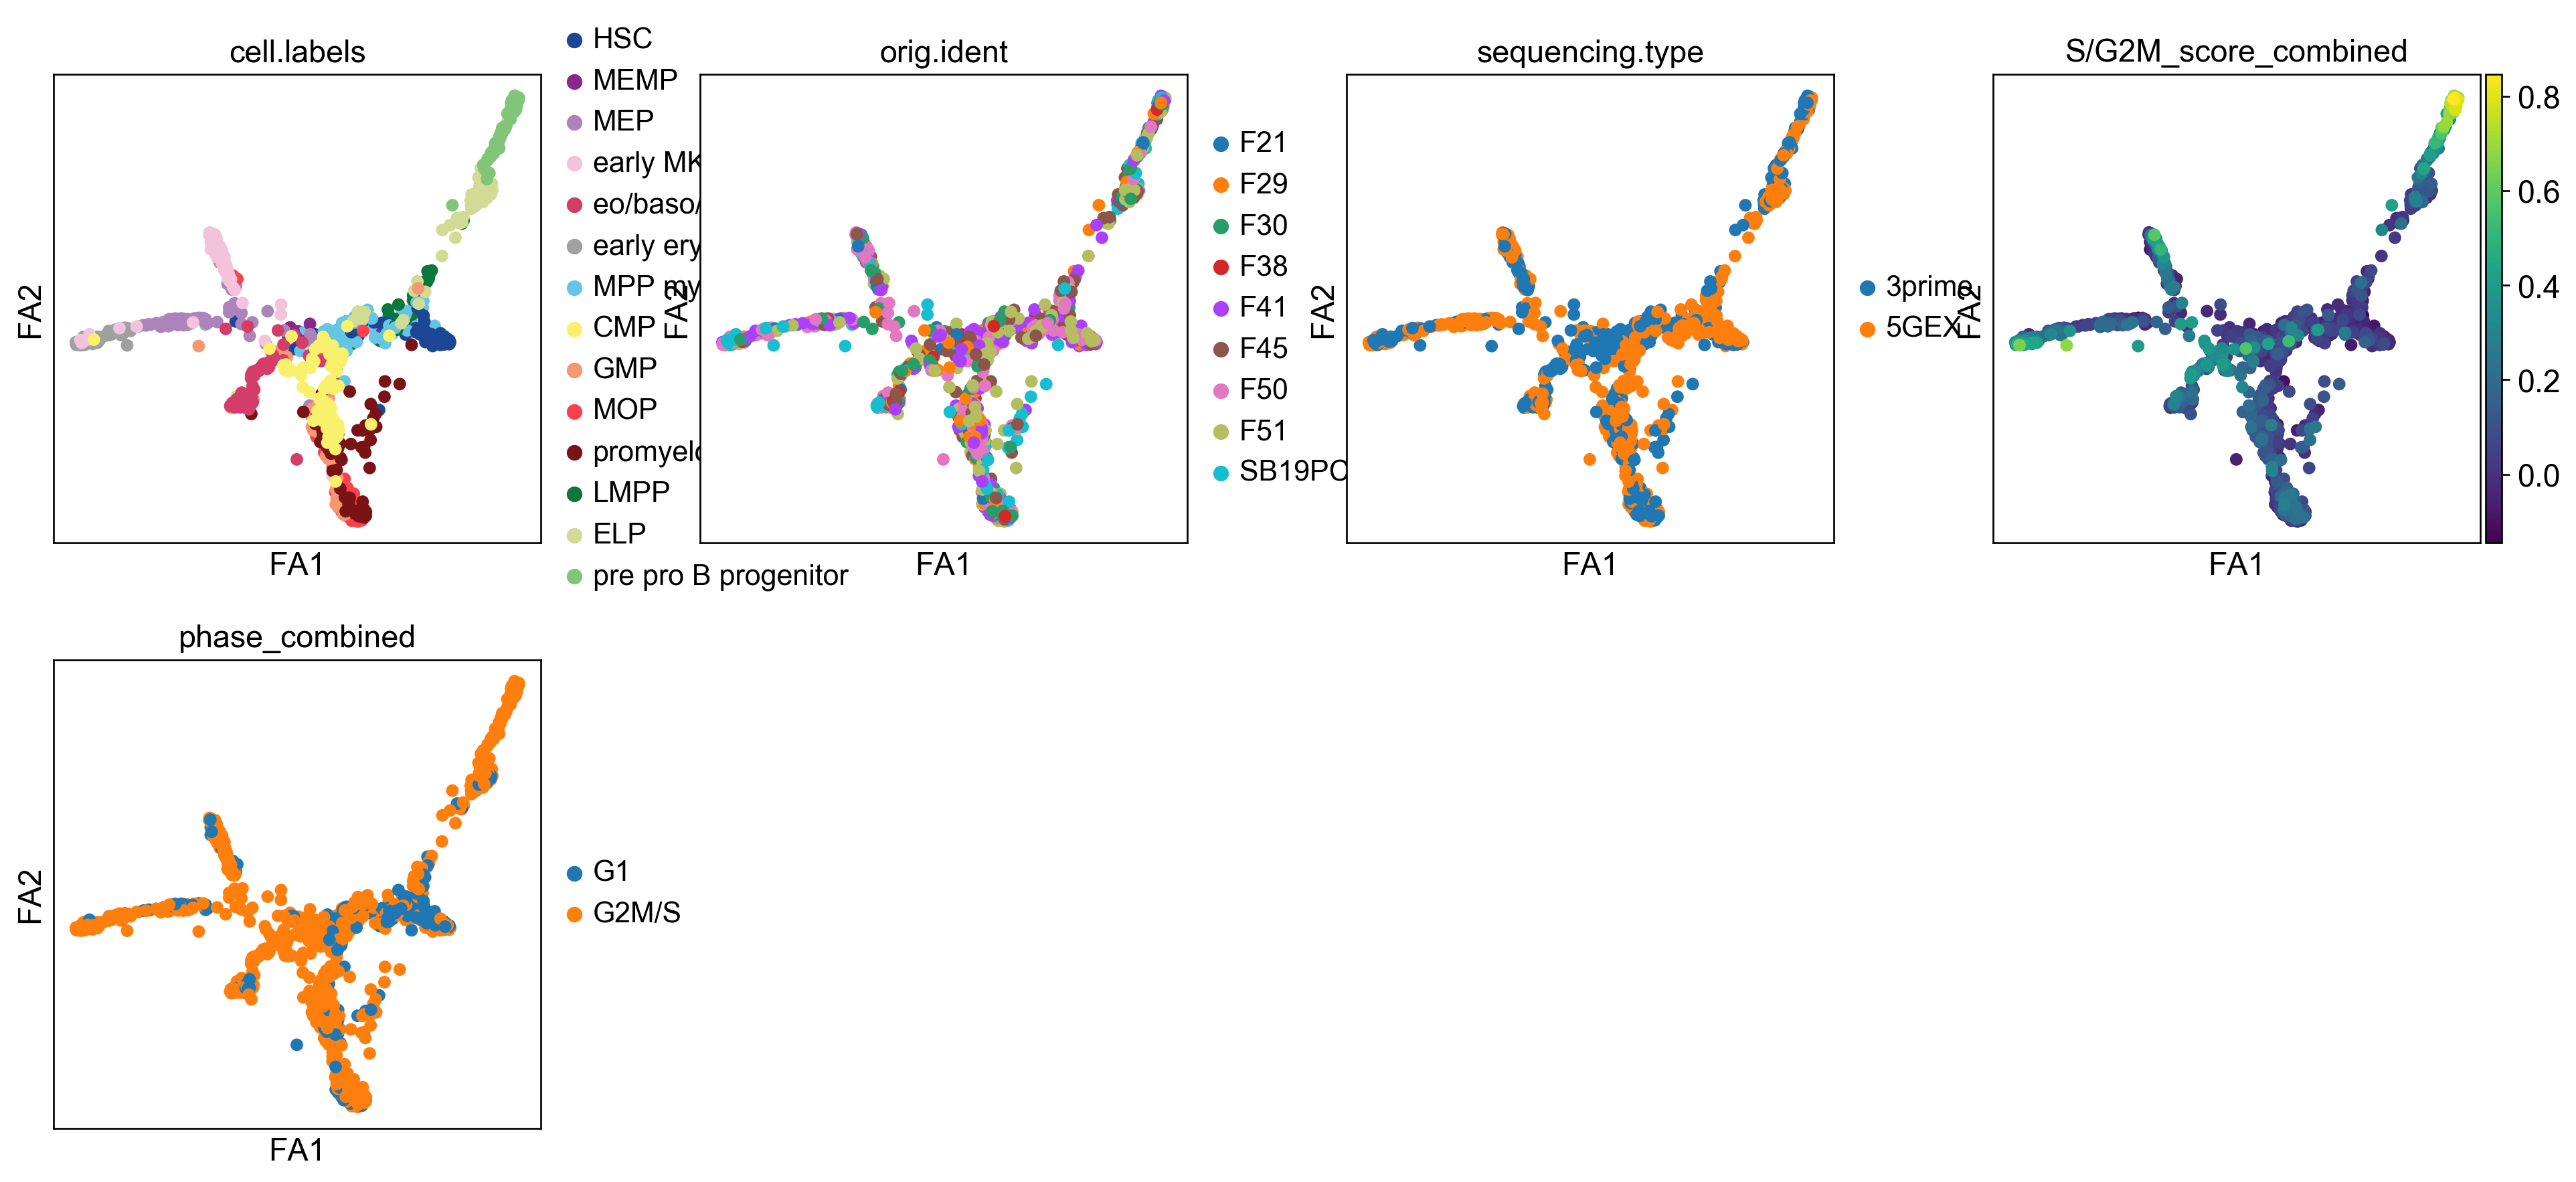

In [14]:
sc.pl.draw_graph(adata, color=['cell.labels', 'orig.ident', 'sequencing.type', 'S/G2M_score_combined', 'phase_combined'], layout='fa')

# Plot UMAP and FDG by celltype/cell-cycle

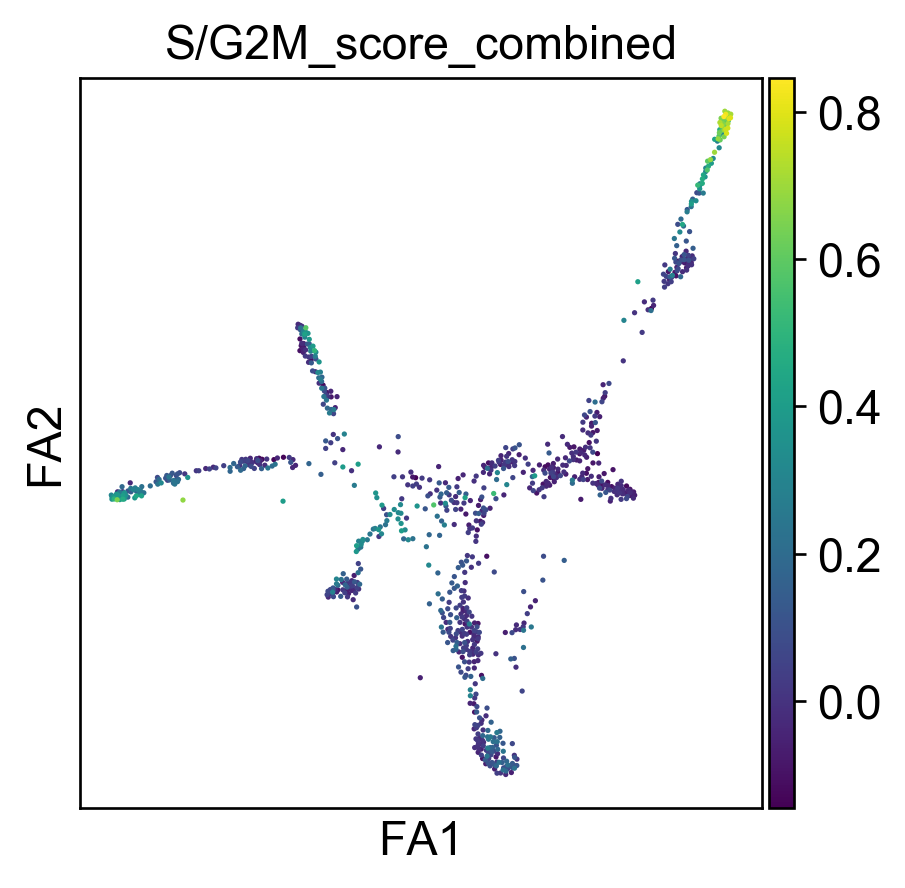

In [15]:
sc.pl.draw_graph(adata, color=['S/G2M_score_combined'], layout='fa', save="progen_fdg_cellcycle_20200721.pdf", 
                 size=10)

# Save the data

In [16]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4a_progen_dr_20200714.h5ad")